In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. Load Tips data set

In [2]:
data = sns.load_dataset("tips")

In [3]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 2. Preprocess

## i.) Define label

In [4]:
data["tip_ratio"] = data["tip"] / data["total_bill"]

#### Figures should be ignored during `nbval` execution

<AxesSubplot:>

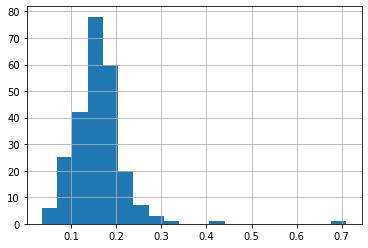

In [5]:
# NBVAL_IGNORE_OUTPUT
data["tip_ratio"].hist(bins=20)

In [6]:
data["is_high_tip"] = data["tip_ratio"] > 0.20
data["is_high_tip"].value_counts() / len(data)

False    0.840164
True     0.159836
Name: is_high_tip, dtype: float64

In [7]:
y = data["is_high_tip"]
X = data.drop("is_high_tip", axis=1)

## ii.) Random train-test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### NOTE: imbalanced label categories are possible

In [9]:
from utils import *

In [10]:
label_diff(y_train, y_test, verbose=True)

Categories in the training set:
False    0.834356
True     0.165644
Name: is_high_tip, dtype: float64
Categories in the test set:
False    0.851852
True     0.148148
Name: is_high_tip, dtype: float64


False    0.017496
True     0.017496
Name: is_high_tip, dtype: float64

## iii.) Label respective train-test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split_wrt_col(X, y)

In [12]:
label_diff(y_train, y_test)

False    0.000985
True     0.000985
Name: LABEL, dtype: float64

### a.) ipytest examples

In [13]:
import ipytest
ipytest.autoconfig()

In [14]:
%%run_pytest[clean] -qq

def test_small_size():
    train, test = sample_and_complement(data, sample_frac=0.3)
    assert len(train) > len(test)
    
def test_large_size():
    train, test = sample_and_complement(data, sample_frac=0.7)
    assert len(train) < len(test)
    
def test_complement():
    train, test = sample_and_complement(data, sample_frac=np.random.random())
    intersection = set(train.index).intersection(set(test.index))
    assert len(intersection) == 0

...                                                                      [100%]


### b.) unit tests for treon

These tests are only executed when you call the `treon` command line interface from the console

In [15]:
import unittest

class TestSampleAndComplement(unittest.TestCase):
    
    def test_small_size(self):
        train, test = sample_and_complement(data, sample_frac=0.3)
        self.assertTrue(len(train) > len(test))

    def test_large_size(self):
        train, test = sample_and_complement(data, sample_frac=0.7)
        self.assertTrue(len(train) < len(test))

    def test_complement(self):
        train, test = sample_and_complement(data, sample_frac=np.random.random())
        intersection = set(train.index).intersection(set(test.index))
        self.assertEqual(len(intersection), 0)